# Creating MLP with Keras

This is a test to creat a MLP with Keras for the Kick Off ANN.

# Libraries

In [15]:
# !pip install tensorflow

In [34]:
# MLP with keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

# data
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# plot
import matplotlib.pyplot as plt

In [35]:
#data
X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Model

In [36]:
model = Sequential()
model.add(Dense(8, input_dim=2, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

#train
history = model.fit(X_train, y_train, epochs=100, verbose=1)

#evaluate
loss, accuracy = model.evaluate(X_test, y_test)
# print('loss:', loss)
# print('accuracy:', accuracy)

#plot the loss
# plt.plot(history.history['loss'])
# plt.xlabel('epoch')
# plt.ylabel('loss')
# plt.show()



c:\Users\tanjo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4869 - loss: 0.7695
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4643 - loss: 0.7490
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4377 - loss: 0.6953
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4421 - loss: 0.6646
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5152 - loss: 0.6388
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5886 - loss: 0.6193
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6862 - loss: 0.5890
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7478 - loss: 0.5628
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7655 - loss: 0.5486
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8164 - loss: 0.5219
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8313 - loss: 0.5068
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy:

In [37]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197 (792.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132 (532.00 B)

In [38]:
class KerasModel:
    def __init__(self, input_dim, layers, activations, optimizer='adam', learning_rate=0.01):
        """
        Initialize the CustomModel class.

        Parameters:
        - input_dim: int, the number of input features.
        - layers: list of int, the number of neurons in each layer.
        - activations: list of str, the activation function for each layer.
        - optimizer: str, the optimizer to use (default is 'adam').
        - learning_rate: float, the learning rate for the optimizer (default is 0.001).
        """
        self.input_dim = input_dim
        self.layers = layers
        self.activations = activations
        self.optimizer = optimizer
        self.learning_rate = learning_rate
        self.model = self.build_model()

    def build_model(self):
        """
        Build the Sequential model based on the specified layers and activations.
        """
        model = Sequential()
        
        # Add the first layer with input dimension
        model.add(Dense(self.layers[0], input_dim=self.input_dim, activation=self.activations[0]))
        
        # Add the remaining layers
        for neurons, activation in zip(self.layers[1:], self.activations[1:]):
            model.add(Dense(neurons, activation=activation))
        
        # Compile the model
        if self.optimizer == 'adam':
            optimizer = Adam(learning_rate=self.learning_rate)
        else:
            raise ValueError("Currently only 'adam' optimizer is supported.")
        
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        
        return model

    def train(self, X_train, y_train, epochs=10, batch_size=32):
        """
        Train the model on the provided training data.

        Parameters:
        - X_train: array-like, the training data.
        - y_train: array-like, the training labels.
        - epochs: int, the number of epochs to train (default is 10).
        - batch_size: int, the batch size for training (default is 32).
        """
        self.history = self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

    def evaluate(self, X_test, y_test):
        """
        Evaluate the model on the provided test data.

        Parameters:
        - X_test: array-like, the test data.
        - y_test: array-like, the test labels.
        """
        return self.model.evaluate(X_test, y_test)

    def predict(self, X):
        """
        Make predictions on the provided data.

        Parameters:
        - X: array-like, the data to make predictions on.
        """
        return self.model.predict(X)

    def save_model(self, filename):
        """
        Save the model to a file.

        Parameters:
        - filename: str, the name of the file to save the model to.
        """
        self.model.save(filename)

    def summary(self):
        """
        Print the summary of the model.
        """
        self.model.summary()

    def load_model(self, filename):
        """
        Load a model from a file.

        Parameters:
        - filename: str, the name of the file to load the model from.
        """
        from keras.models import load_model
        self.model = load_model(filename)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6052 - loss: 1.6035
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8729 - loss: 0.2920
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8943 - loss: 0.2362
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8903 - loss: 0.2135
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9174 - loss: 0.1653
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9621 - loss: 0.1203
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9891 - loss: 0.0530
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9942 - loss: 0.0338
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0172
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9988 - loss: 0.0146
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9996 - loss: 0.0085
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy:

Test Accuracy: 0.9933333396911621
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


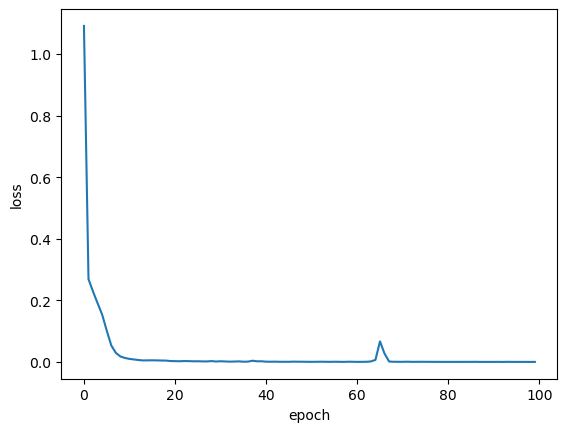

In [39]:
# One-hot encode the target arrays
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Example
if __name__ == "__main__":
    # Define the model parameters
    input_dim = 2  # Number of input features
    layers = [32, 12, 10] # The last one is the number of output classes
    activations = ['relu', 'relu', 'softmax']

    # Create the custom model
    custom_model = KerasModel(input_dim, layers, activations)

    # Assume X_train, y_train, X_test, y_test are your data
    # Train the model
    custom_model.train(X_train, y_train_one_hot, epochs=100, batch_size=32)

    # Evaluate the model
    loss, accuracy = custom_model.evaluate(X_test, y_test_one_hot)
    print(f"Test Accuracy: {accuracy}")

    # Save the model
    # custom_model.save_model("custom_model.h5")

    # Load the model
    custom_model.load_model("custom_model.h5")

    # Make predictions
    predictions = custom_model.predict(X_test)

    # plot the loss of the model
    plt.plot(custom_model.history.history['loss'])
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

In [40]:
custom_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 12)             │           396 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 624 (2.44 KB)

 Trainable params: 622 (2.43 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [53]:
# Import the data 
import pandas as pd

df = pd.read_csv('data.csv', sep=';')

df_enrolled = df[df['Target'] == 'Enrolled']
df = df[df['Target'] != 'Enrolled']

# Selecting the target
y = df['Target']
# Change it to binary
y = y.apply(lambda x: 1 if x == 'Graduate' else 0)

# Selecting the features
X = df.drop(columns=['Target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Example
if __name__ == "__main__":
    # Define the model parameters
    input_dim = X.shape[1]  # Number of input features
    layers = [8, 1] # The last one is the number of output classes
    activations = ['relu', 'sigmoid']

    # Create the custom model
    custom_model = KerasModel(input_dim, layers, activations)

    # Assume X_train, y_train, X_test, y_test are your data
    # Train the model
    custom_model.train(X_train, y_train, epochs=100, batch_size=32)

    # Evaluate the model
    loss, accuracy = custom_model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {accuracy}")

    # Save the model
    # custom_model.save_model("custom_model.h5")

    # Load the model
    custom_model.load_model("custom_model.h5")

    # Make predictions
    predictions = custom_model.predict(X_test)

    # plot the loss of the model
    plt.plot(custom_model.history.history['loss'])
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()


Epoch 1/100


c:\Users\tanjo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\tanjo\anaconda3\Lib\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5211 - loss: 0.0000e+00
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4089 - loss: 0.0000e+00
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4120 - loss: 0.0000e+00
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4109 - loss: 0.0000e+00
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4114 - loss: 0.0000e+00
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3949 - loss: 0.0000e+00
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3928 - loss: 0.0000e+00
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3711 - loss: 0.0000e+00
Epoch 9/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3953 - loss: 0.0000e+00
Epoch 10/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4050 - loss: 0.0000e+00
Epoch 11/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3890 - loss: 0.0000e+00
Epoch 12/100
91/91 ━━━━━━━━━━━━

c:\Users\tanjo\anaconda3\Lib\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3455 - loss: 0.0000e+00 


Test Accuracy: 0.37603306770324707


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (32, 36)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 36), dtype=float32)
  • training=False
  • mask=None